In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [3]:
#Initial conditions
G = 1
M = 1
R = 1
v_esc = np.sqrt(2*G*M/R)
v_rel = v_esc/2
b_col = R*np.sqrt(1 + (v_esc/v_rel)**2)
b_scat = ((v_esc/v_rel)**2)*R

In [7]:
def vec_differeq(t, vec):
    # vec = [x, y, v_x, v_y]
    [x,y,v_x,v_y] = vec
    r = np.sqrt(x**2 + y**2)
    a = -(G*M/r**2)
    a_x = a*x/r
    a_y = a*y/r

    return [v_x, v_y, a_x, a_y]
t_init,t_final = 0, 40
t_span = [t_init,t_final] #Span 25 time units
t_eval = np.linspace(t_init,t_final, 1000)

#Initial conditions
# For collision
y0_collision = [-10,b_col,v_rel,0]

# For scattering
y0_scattering = [-10,b_scat,v_rel,0]

# For scattering
y0_scattering_2 = [-10,2*b_scat,v_rel,0]


In [8]:
#Solve the differential equation
sol_collision = solve_ivp(vec_differeq, t_span, y0_collision, t_eval = t_eval)
sol_scattering = solve_ivp(vec_differeq, t_span, y0_scattering, t_eval = t_eval)
sol_scattering_2 = solve_ivp(vec_differeq, t_span, y0_scattering_2, t_eval = t_eval)


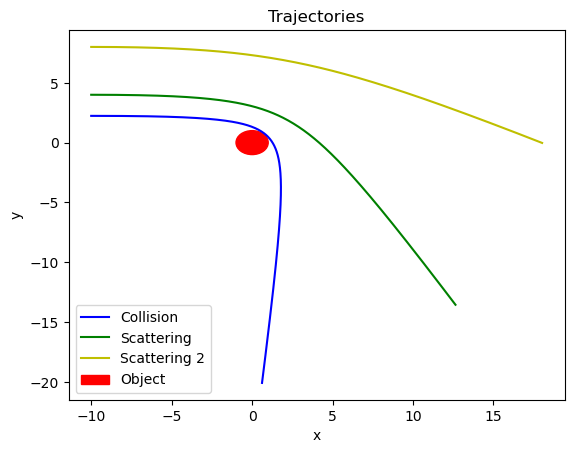

In [9]:
fig,ax = plt.subplots()
ax.plot(sol_collision.y[0], sol_collision.y[1], label = 'Collision', color = 'b')
ax.plot(sol_scattering.y[0], sol_scattering.y[1], label = 'Scattering', color = 'g')
ax.plot(sol_scattering_2.y[0], sol_scattering_2.y[1], label = 'Scattering 2', color = 'y')
my_circle = plt.Circle((0,0),1, color = 'r', label = 'Object')
ax.add_artist(my_circle)
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.title('Trajectories')
plt.show()